In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
%matplotlib inline 

## Lets load boston house pricing dataset

In [2]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston_df = pd.read_csv(url)

# Show first 5 rows

boston_df.rename(columns={'medv': 'price'}, inplace=True)
print(boston_df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  price  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  394.63   2.94   33.4  
4  396.90   5.33   36.2  


In [3]:
boston_df.shape


(506, 14)

In [4]:
# checking missing values
boston_df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

In [5]:
# Statical method 
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# Understading co-relation batween various featurews in dataset
# 1. positive
# 2. Negative


corelation = boston_df.corr()


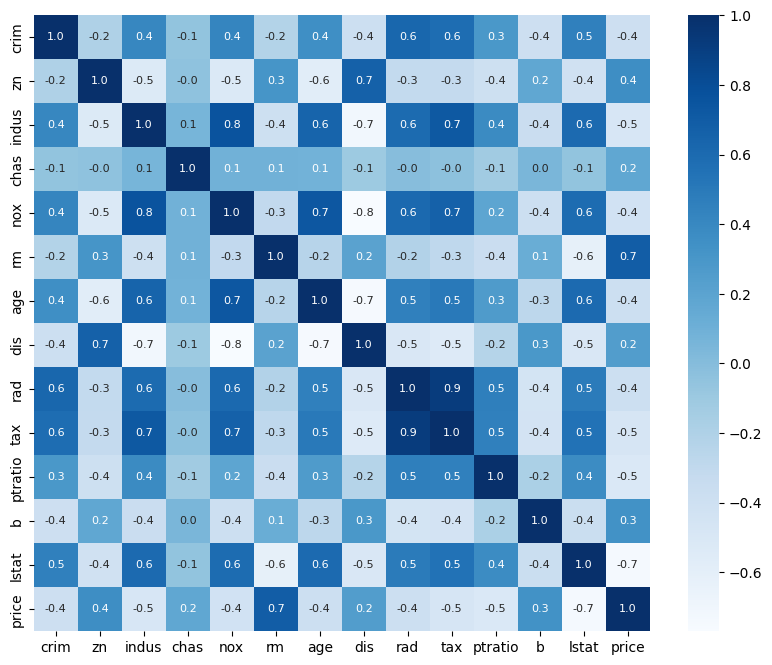

In [7]:
# construct a heapmap to unserstand corelation

plt.figure(figsize=(10,8))
sns.heatmap(corelation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')
plt.show()

Text(0, 0.5, 'Price')

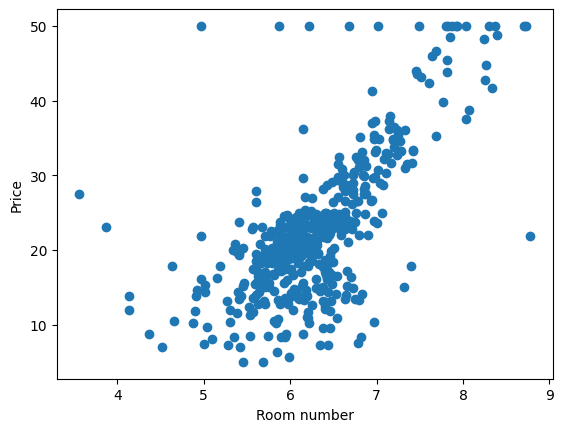

In [8]:
plt.scatter(boston_df['rm'],boston_df['price'])
plt.xlabel("Room number")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

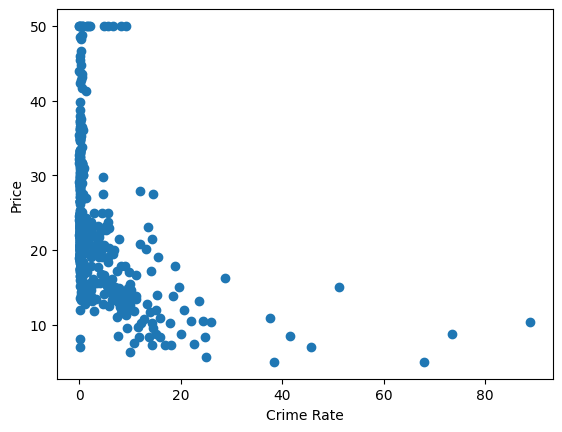

In [9]:
plt.scatter(boston_df['crim'],boston_df['price'])
plt.xlabel("Crime Rate")
plt.ylabel("Price")

<Axes: xlabel='rm', ylabel='price'>

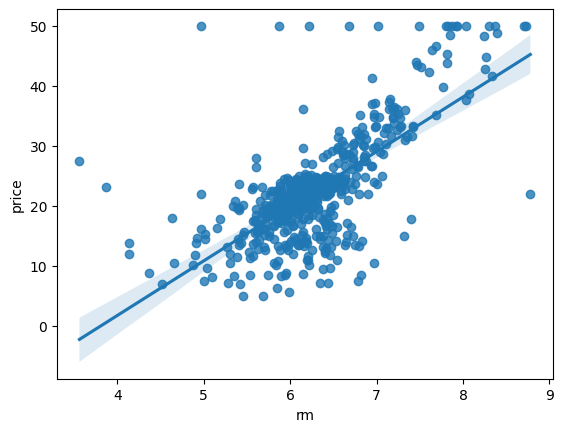

In [10]:
sns.regplot(x='rm',y='price',data=boston_df)

<Axes: xlabel='lstat', ylabel='price'>

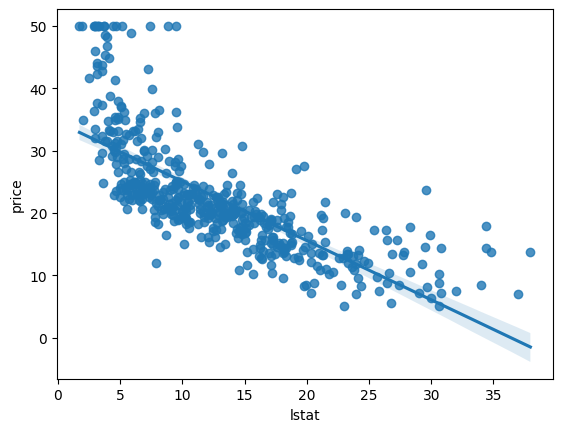

In [11]:
sns.regplot(x='lstat',y='price',data=boston_df)

In [92]:
## Independent and dependent features

X = boston_df.drop('price', axis=1)
Y = boston_df['price']


In [93]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [94]:
## Train test split

X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.3,random_state=42) #30% test data


In [95]:
# Standardize the dataset

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

# Model Training

In [96]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()


In [97]:
model.fit(X_train,Y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [98]:
## print the cofficient and the intercept

print(model.coef_)
print()
print(model.intercept_)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]

23.01581920903955


In [99]:
## On which parameter the model has been trained

print(model.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False, 'tol': 1e-06}


In [100]:
# Prediction test data

test_predict=model.predict(X_test)


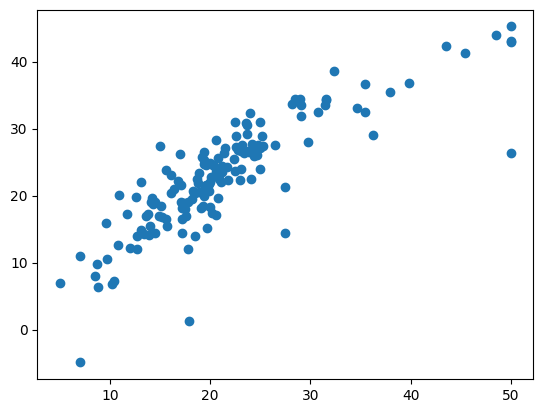

In [101]:
## Plot scatter plot for prediction

plt.scatter(Y_test,test_predict)


In [102]:
## Residuals 
residuals=Y_test-test_predict
residuals

173   -7.178348
274   -6.265815
491   -3.367053
72    -3.990358
452   -4.260680
         ...   
441   -1.932183
23     0.024974
225    7.112374
433   -4.399470
447   -7.225302
Name: price, Length: 152, dtype: float64

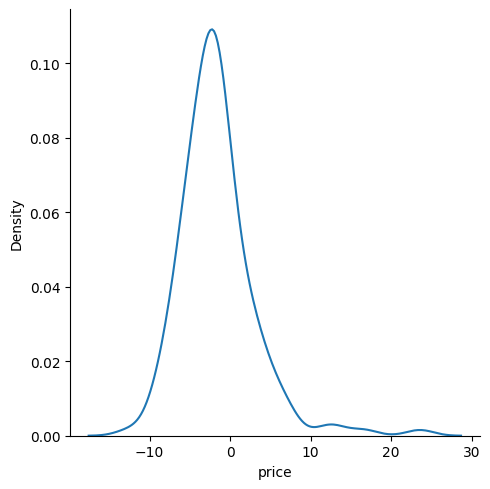

In [103]:
## plot this residuals 

sns.displot(residuals,kind='kde')

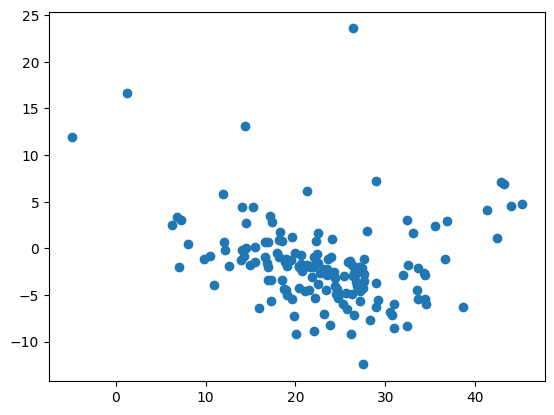

In [104]:
## scatter plot ( residuals bs prediction)
##uniform distribution

plt.scatter(test_predict,residuals)

In [105]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error



print(mean_absolute_error(Y_test,test_predict))
print(mean_squared_error(Y_test,test_predict))
print(np.sqrt(mean_squared_error(Y_test,test_predict)))

3.744212793154548
24.13479128906756
4.912717301969202


In [106]:
## R squared and adjusted R squared 

score_1=metrics.r2_score(Y_test,test_predict)
print(score_1)





0.6761000049033605


In [107]:
# display adjusted R-squared
1-(1-score_1)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.6455876865246917

## New Data Predtiction

In [108]:
# Get feature column names from the original X
feature_columns = X.columns

# Extract new data as a DataFrame instead of NumPy array
new_data_df = pd.DataFrame([boston_df.iloc[0, :-1].values], columns=feature_columns)

# Now scaling won't show any warning
new_data_scaled = scaler.transform(new_data_df)
prediction = model.predict(new_data_scaled)

print("Prediction:", prediction)

Prediction: [32.36964545]


## Pickling the model file for deployment

In [109]:
import pickle

In [111]:
pickle.dump(model,open('RegModel.pkl','wb'))

In [113]:
pickle_model=pickle.load(open('RegModel.pkl','rb'))

In [114]:
pickle_model.predict(new_data_scaled)

array([32.36964545])